In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2003-11-07'
end = '2024-06-07'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
ma_100_days = data.Close.rolling(100).mean()

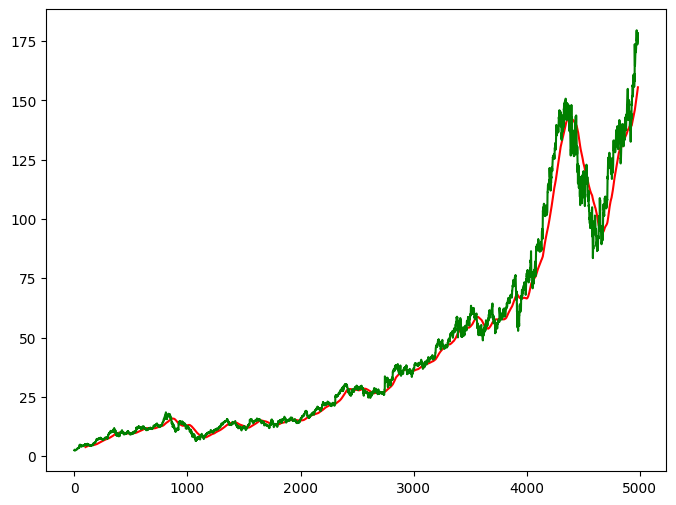

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

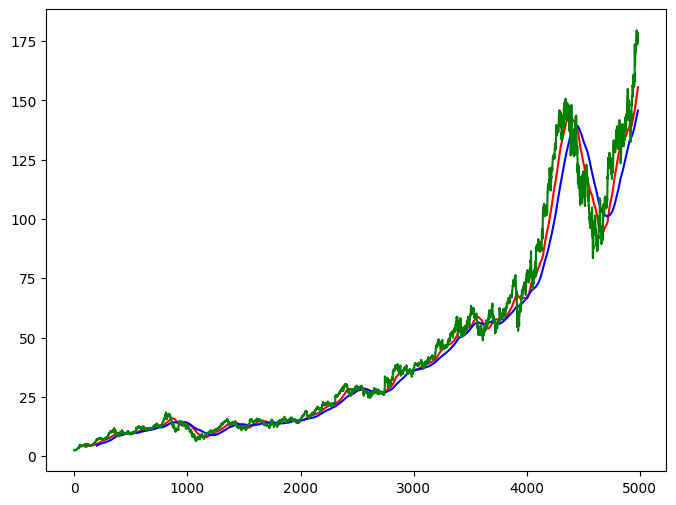

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [10]:
data_train.shape[0]

3987

In [11]:
data_test.shape[0]

997

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [15]:
x, y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\ANISH MANISH JAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - loss: 0.0496
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - loss: 0.0048
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - loss: 0.0045
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - loss: 0.0037
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - loss: 0.0033
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - loss: 0.0030
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.0027
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.0026
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.0026
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - loss: 0.0025
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - loss: 0.0021
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.0020
Epoch 13/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.0022
Epoch 14/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - loss: 0.0020
Epoch 15/50
122

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
past_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([past_100_days,data_test], ignore_index = True)

In [23]:
data_test

,Close
0,72.931503
1,72.792000
2,71.711502
3,74.296997
4,72.353500
...,...
1092,173.960007
1093,174.419998
1094,175.130005
1095,177.070007


In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x , y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


In [27]:
scale = 1/scaler.scale_

In [28]:
y_predict = y_predict * scale

In [29]:
y=y*scale

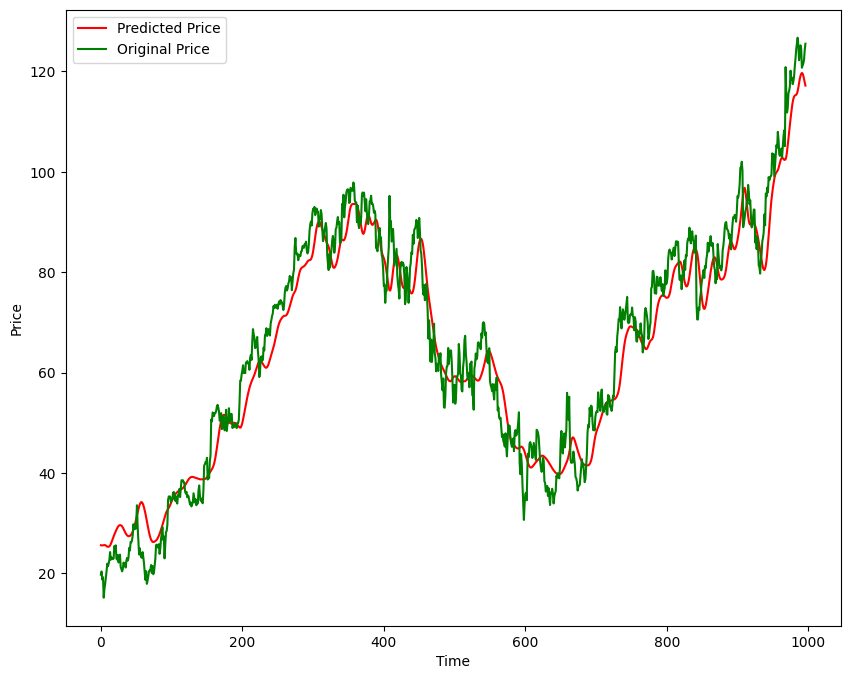

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Prediction Model.keras')